In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
df=pd.read_csv('/content/drive/MyDrive/data_k_mean.txt',sep='\s+',header=None)
df = pd.DataFrame(df)

In [3]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
x = df[0]
y = df[1]

In [5]:
print(y[:10])

0   -4.86573
1   -6.87944
2   -5.83080
3   -4.15571
4   -4.22840
5    0.99790
6   -6.00562
7    0.16283
8   -0.44060
9   -6.04326
Name: 1, dtype: float64


In [6]:
x=x.to_list()
y=y.to_list()

In [7]:
len(x)

3000

In [8]:
k=0
k=int(input("Enter number of clusters:"))

Enter number of clusters:2


In [9]:
ctrd_lst = np.array([[randint(-10,10),randint(-10,5)] for i in range(k)])

clss=[[] for i in range(k)]
pnt_x=[[] for i in range(k)]
pnt_y=[[] for i in range(k)]

pnt_move = True
cmap=["red","green","blue","orange","pink","brown","gray","olive","cyan","purple"]

In [10]:
def sctr_plot():
  for i in range(k):
    plt.scatter(pnt_x[i], pnt_y[i], 10, color=cmap[i])
  plt.show()

In [11]:
def assign_obj():
  for i in range(k):
    clss[i].clear()
  
  for pnt_idx in range(len(x)):
      dist = []
      for i in ctrd_lst:
            
          dist.append(((i[0] - x[pnt_idx]) ** 2 + (i[1] - y[pnt_idx]) ** 2) ** 0.5)

        
      smallest_dist_idx = dist.index(min(dist))

        
      for i in range(k):
        if smallest_dist_idx == i:
          clss[i].append(pnt_idx)
  cpy_pos() 
    

In [12]:
def cpy_pos():
  for i in range(k):
    pnt_x[i].clear()
    pnt_y[i].clear()
  
  for j in range(k):
    for i in clss[j]:
      pnt_x[j].append(x[i])
      pnt_y[j].append(y[i])


In [13]:
def update_ctrd():
  prev_ctrd = ctrd_lst.copy()
   
  for i in range(k):
    if len(clss[i]) != 0 :
      (ctrd_lst[i])[0] = np.mean(pnt_x[i])
      (ctrd_lst[i])[1] = np.mean(pnt_y[i])

    
  cmpr = (prev_ctrd == ctrd_lst)
  if cmpr.all():
       
      return False
  else:
      return True
        

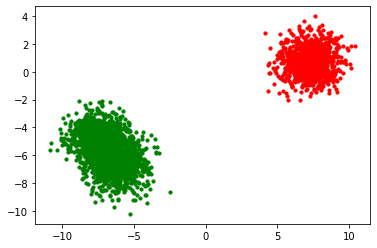

After iteration: 1


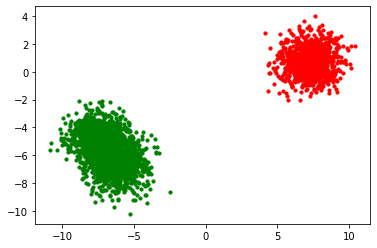

After iteration: 2


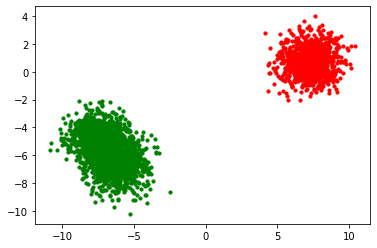

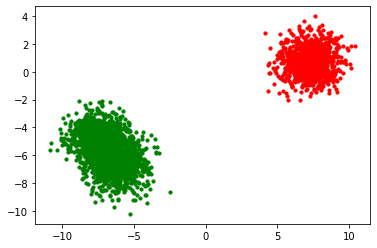

Total iterations: 2
[5, 7, 8, 11, 16, 18, 20, 21, 25, 33, 34, 39, 43, 44, 47, 48, 50, 54, 59, 68, 73, 74, 75, 89, 90, 91, 93, 95, 98, 101, 102, 107, 113, 115, 117, 125, 130, 131, 133, 135, 138, 139, 140, 144, 147, 148, 154, 157, 158, 161, 162, 163, 165, 166, 168, 169, 172, 174, 175, 176, 177, 179, 182, 188, 189, 190, 192, 199, 200, 209, 214, 215, 218, 221, 223, 225, 227, 228, 229, 234, 239, 245, 247, 248, 249, 253, 255, 257, 258, 259, 262, 263, 266, 267, 268, 269, 270, 271, 272, 275, 276, 277, 278, 282, 289, 290, 291, 292, 293, 296, 300, 302, 305, 313, 316, 317, 319, 320, 331, 332, 335, 336, 337, 339, 340, 346, 348, 350, 354, 355, 357, 358, 360, 363, 364, 368, 370, 376, 378, 384, 387, 390, 392, 394, 395, 397, 402, 405, 408, 426, 429, 436, 437, 438, 440, 443, 445, 446, 447, 457, 464, 465, 471, 472, 473, 474, 476, 479, 480, 482, 483, 485, 492, 495, 502, 504, 505, 509, 510, 511, 514, 518, 519, 520, 521, 526, 527, 528, 529, 530, 531, 533, 538, 540, 541, 543, 545, 548, 549, 550, 552, 553, 5

In [14]:
assign_obj()

sctr_plot()
cnt = 0
while pnt_move: 
  cnt = cnt + 1 
  assign_obj()
  pnt_move = update_ctrd()
   
  print("After iteration: " + str(cnt))
  sctr_plot() 

sctr_plot()

print("Total iterations: " + str(cnt))
for i in range(k):
  print(clss[i])

In [15]:
ctrd_lst

array([[ 7,  0],
       [-6, -5]])